## DBS course Project (Summer Semester 2021 - FU Berlin)
## Data Proprocessin

In [3]:
# general utility import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

## Import data from csv files

In [15]:
#import population total
pop_total  = pd.read_csv(r'data/population_total.csv',header=0) 
#import population growth
pop_growth = pd.read_csv(r'data/population_growth.csv',header=0) 
#import population gdp
gdp        = pd.read_csv(r'data/gdp.csv',header=0) 
#import co2 emissions
co2        = pd.read_csv(r'data/co2_emission.csv',header=0) 

### Population total

In [12]:
pop_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12595 entries, 0 to 12594
Data columns (total 3 columns):
Country Name    12595 non-null object
Year            12595 non-null int64
Count           12595 non-null int64
dtypes: int64(2), object(1)
memory usage: 295.3+ KB


### Population Growth

In [28]:
pop_growth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 65 columns):
Country Name      264 non-null object
Country Code      264 non-null object
Indicator Name    264 non-null object
Indicator Code    264 non-null object
1960              0 non-null float64
1961              260 non-null float64
1962              260 non-null float64
1963              260 non-null float64
1964              260 non-null float64
1965              260 non-null float64
1966              260 non-null float64
1967              260 non-null float64
1968              260 non-null float64
1969              260 non-null float64
1970              260 non-null float64
1971              260 non-null float64
1972              260 non-null float64
1973              260 non-null float64
1974              260 non-null float64
1975              260 non-null float64
1976              260 non-null float64
1977              260 non-null float64
1978              260 non-null float64
1979

In [29]:
# are there any states for which we don't have any data at all (probably drop those states)?
years = pop_growth.columns.tolist()[4:]
pop_growth[pop_growth['Country Name']=='Not classified']

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
108,Not classified,INX,Population growth (annual %),SP.POP.GROW,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
descriptives = pop_growth.describe()
descriptives.iloc[:,:10] #60s

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969
count,0.0,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
mean,NaN,2.204274,2.259022,2.331811,2.278732,2.271486,2.242152,2.233238,2.223289,2.198261
std,NaN,1.336252,1.380656,1.542037,1.349095,1.328695,1.322772,1.336768,1.476444,1.396625
min,NaN,-1.015528,-0.460077,-0.851321,-1.196546,-1.450543,-1.758963,-2.011787,-2.109112,-1.892842
25%,NaN,1.417310,1.407149,1.458451,1.505992,1.478890,1.344409,1.298640,1.306251,1.324754
50%,NaN,2.162583,2.225297,2.341844,2.333207,2.333497,2.387502,2.346530,2.316236,2.305103
75%,NaN,2.831257,2.850254,2.832472,2.827877,2.824372,2.809020,2.793449,2.767433,2.759078
max,NaN,11.088145,11.541440,12.851885,11.262706,10.756451,10.284144,9.822764,12.612111,10.628219


In [33]:
descriptives.iloc[:,10:20] #70s

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979
count,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
mean,2.175478,2.182248,2.127387,2.097771,2.084598,2.055709,2.015345,1.970956,1.974762,1.993673
std,1.471196,1.639190,1.611011,1.686437,1.616371,1.608440,1.671262,1.770276,1.697690,1.555888
min,-1.440179,-1.704010,-3.176964,-4.181183,-4.371189,-3.823915,-3.112038,-3.129595,-3.374472,-2.722686
25%,1.237485,1.196730,1.149286,1.088136,1.129042,1.084517,1.028622,0.983632,0.989717,0.947492
50%,2.289872,2.264441,2.262340,2.203817,2.172479,2.100819,2.041758,2.006740,2.026527,2.014135
75%,2.733494,2.735738,2.716067,2.732657,2.731883,2.728049,2.743649,2.760058,2.806233,2.835924
max,14.378728,16.820114,17.632340,17.589359,16.936112,15.952988,15.139161,14.212240,12.770151,10.902354


In [34]:
descriptives.iloc[:,20:30] #80s

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989
count,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
mean,2.025607,2.040273,2.047748,2.037583,2.051571,2.074123,2.086352,2.092224,2.013941,1.925157
std,1.411959,1.437235,1.535915,1.554111,1.588899,1.858667,2.180231,2.216050,1.976186,1.616368
min,-1.138323,-1.393544,-3.625668,-2.712948,-2.695480,-2.204368,-1.706772,-1.303070,-1.464560,-1.564563
25%,0.976562,0.896723,0.979755,0.918346,0.896703,0.857732,0.839334,0.860643,0.784978,0.757928
50%,2.189102,2.182825,2.187141,2.183126,2.156298,2.092645,2.056303,2.028858,1.991965,1.977662
75%,2.845778,2.789015,2.802792,2.831913,2.839411,2.813787,2.846209,2.850481,2.817071,2.777924
max,9.001295,10.337851,11.145270,11.487528,11.975557,19.944592,27.478395,28.059956,23.487217,16.398229


In [35]:
descriptives.iloc[:,30:40] #90s

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
count,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,262.000000,262.000000,262.000000,263.000000
mean,1.846751,1.753938,1.654201,1.607039,1.558513,1.514247,1.524550,1.520023,1.478523,1.431548
std,1.381979,1.427810,1.554248,1.628826,1.539957,1.381493,1.288901,1.328571,1.461262,1.551894
min,-1.803750,-3.104373,-5.538715,-6.766223,-5.849940,-4.168689,-3.629546,-3.207518,-5.924733,-10.955149
25%,0.707858,0.707416,0.682257,0.654513,0.602938,0.539085,0.652529,0.546371,0.579944,0.545674
50%,1.919277,1.893370,1.766089,1.717771,1.638498,1.567359,1.540881,1.507510,1.500367,1.437696
75%,2.779694,2.731733,2.687845,2.578822,2.558891,2.521353,2.457131,2.417831,2.301871,2.341394
max,9.295889,6.900156,8.546120,8.790889,7.659777,5.884257,5.736047,7.390740,8.117928,7.448556


In [36]:
descriptives.iloc[:,40:50] #2000s

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009
count,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000
mean,1.440130,1.427376,1.457798,1.487428,1.455775,1.507310,1.533732,1.524481,1.519775,1.465311
std,1.334481,1.316648,1.270352,1.380911,1.557707,1.578911,1.750283,1.828778,1.766112,1.585456
min,-4.075386,-3.847671,-2.170699,-1.474533,-9.080638,-1.628401,-1.596378,-1.974326,-2.398298,-2.265635
25%,0.604333,0.600943,0.544708,0.526311,0.571125,0.549282,0.584727,0.556259,0.573201,0.514383
50%,1.413118,1.416714,1.394296,1.364210,1.341877,1.336301,1.289649,1.247594,1.315065,1.236195
75%,2.344882,2.370838,2.353820,2.302188,2.358308,2.385330,2.383967,2.374612,2.289768,2.320088
max,5.604957,6.754370,7.408811,7.786010,9.978993,13.870163,16.700191,17.510948,16.475803,14.144634


In [38]:
descriptives.iloc[:,50:61] #2010s

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
count,263.000000,263.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,0.0
mean,1.405233,1.327944,1.354801,1.355821,1.344129,1.311826,1.291927,1.240639,1.210710,1.209790,NaN
std,1.443233,1.424396,1.368932,1.394922,1.380695,1.240803,1.169114,1.143136,1.137116,1.054549,NaN
min,-2.096943,-2.628656,-3.084734,-4.289118,-4.536565,-3.913350,-3.066274,-2.418018,-4.048391,-1.805226,NaN
25%,0.486284,0.427213,0.477858,0.493334,0.506497,0.522496,0.525395,0.496925,0.469809,0.458366,NaN
50%,1.221877,1.210667,1.189515,1.183372,1.192959,1.174101,1.167489,1.191452,1.139799,1.120784,NaN
75%,2.313841,2.254728,2.213038,2.228879,2.181746,2.200686,2.133758,2.049479,1.980537,1.949884,NaN
max,11.482901,9.232393,7.574748,7.349640,9.109231,5.790631,4.845614,4.677987,4.921161,4.469239,NaN


In [39]:
# use melt method
pgrowth = pd.melt(pop_growth, id_vars=['Country Name','Country Code'],value_vars=years,var_name='Year',value_name='Growth')
pgrowth.head()

,Country Name,Country Code,Year,Growth
0,Aruba,ABW,1960,NaN
1,Afghanistan,AFG,1960,NaN
2,Angola,AGO,1960,NaN
3,Albania,ALB,1960,NaN
4,Andorra,AND,1960,NaN


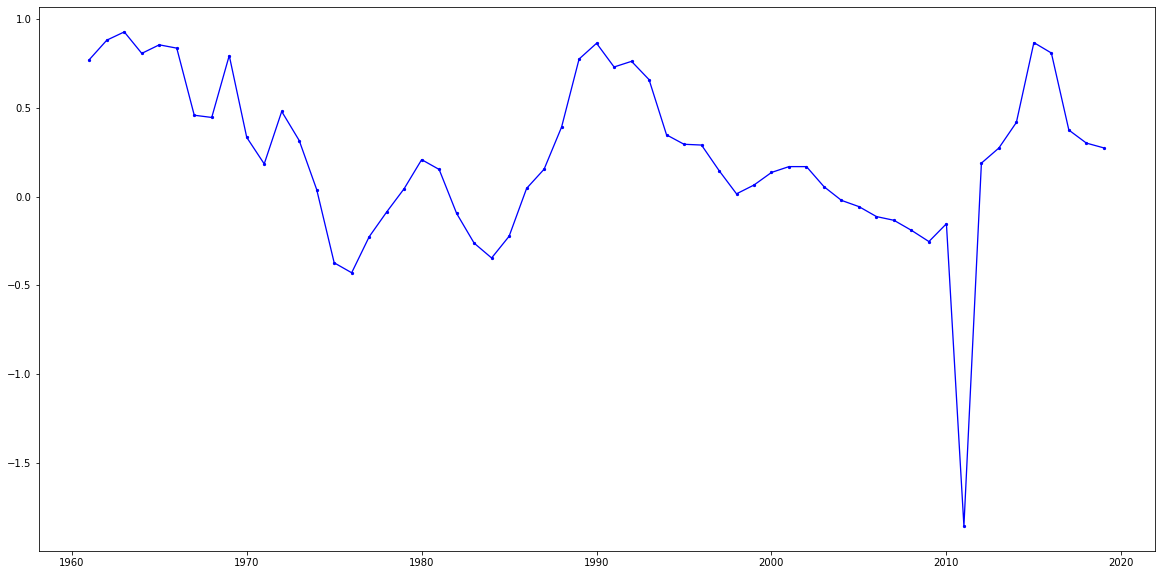

In [44]:
# plots
fig = plt.figure(figsize=(20,10))
#gs = gridspec.GridSpec(1,1)
#ax = {}

plt.plot([int(i) for i in years],
         pgrowth[pgrowth['Country Name']=='Germany']['Growth'],
         color='b',
         linewidth=1.3)
plt.scatter([int(i) for i in years],
         pgrowth[pgrowth['Country Name']=='Germany']['Growth'],
         color='b',
         marker='o',
         s=5)
plt.show()



### GDP in US dollars

In [45]:
gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 65 columns):
Country Name      264 non-null object
Country Code      264 non-null object
Indicator Name    264 non-null object
Indicator Code    264 non-null object
1960              131 non-null float64
1961              132 non-null float64
1962              135 non-null float64
1963              135 non-null float64
1964              135 non-null float64
1965              144 non-null float64
1966              148 non-null float64
1967              152 non-null float64
1968              156 non-null float64
1969              156 non-null float64
1970              167 non-null float64
1971              168 non-null float64
1972              168 non-null float64
1973              168 non-null float64
1974              169 non-null float64
1975              172 non-null float64
1976              173 non-null float64
1977              176 non-null float64
1978              175 non-null float64
19

In [51]:
# use melt method like for population growth
gdp_new = pd.melt(gdp, id_vars=['Country Name','Country Code'],value_vars=years,var_name='Year',value_name='Gdp')
gdp_new.head()

,Country Name,Country Code,Year,Gdp
0,Aruba,ABW,1960,NaN
1,Afghanistan,AFG,1960,5.377778e+08
2,Angola,AGO,1960,NaN
3,Albania,ALB,1960,NaN
4,Andorra,AND,1960,NaN


In [52]:
gdp_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16104 entries, 0 to 16103
Data columns (total 4 columns):
Country Name    16104 non-null object
Country Code    16104 non-null object
Year            16104 non-null object
Gdp             12401 non-null float64
dtypes: float64(1), object(3)
memory usage: 503.3+ KB


Only one indicator, the indicator name and code have only one value in the columns

In [53]:
gdp['Indicator Name'].unique()

array(['GDP (current US$)'], dtype=object)

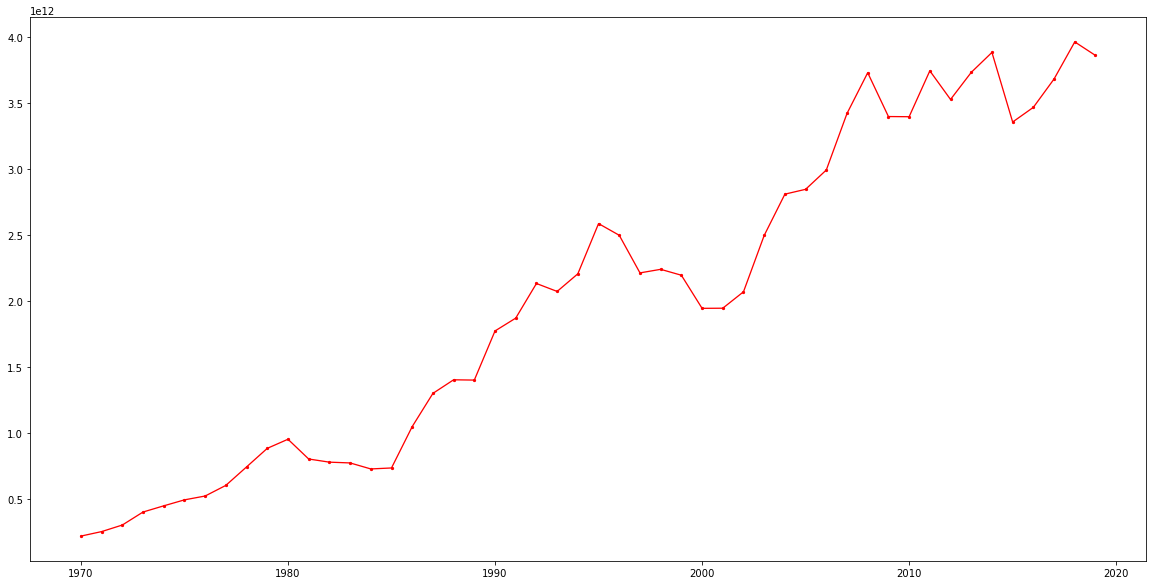

In [54]:
# plots
fig = plt.figure(figsize=(20,10))
#gs = gridspec.GridSpec(1,1)
#ax = {}

plt.plot([int(i) for i in years],
         gdp_new[gdp_new['Country Name']=='Germany']['Gdp'],
         color='r',
         linewidth=1.3)
plt.scatter([int(i) for i in years],
         gdp_new[gdp_new['Country Name']=='Germany']['Gdp'],
         color='r',
         marker='o',
         s=5)
plt.show()


### CO_2 emissions

In [7]:
co2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20853 entries, 0 to 20852
Data columns (total 4 columns):
Entity                            20853 non-null object
Code                              18646 non-null object
Year                              20853 non-null int64
Annual CO₂ emissions (tonnes )    20853 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 651.7+ KB


Some country entities have no code, what entities? Can a code be inserted for these entitites?

In [12]:
co2[co2['Code'].isna()]['Entity'].unique()

array(['Africa', 'Americas (other)', 'Antarctic Fisheries',
       'Asia and Pacific (other)', 'EU-28', 'Europe (other)',
       'International transport', 'Kyrgysztan', 'Middle East',
       'Statistical differences', 'Wallis and Futuna Islands'],
      dtype=object)

In [55]:
# rename column emissions 
co2.rename(columns={"Annual CO₂ emissions (tonnes )": "Emissions"},inplace=True)

In [65]:
co2[(co2['Entity']=='Germany') & (co2['Year']>1959)]['Emissions'].isna()

7925    False
7926    False
7927    False
7928    False
7929    False
7930    False
7931    False
7932    False
7933    False
7934    False
7935    False
7936    False
7937    False
7938    False
7939    False
7940    False
7941    False
7942    False
7943    False
7944    False
7945    False
7946    False
7947    False
7948    False
7949    False
7950    False
7951    False
7952    False
7953    False
7954    False
7955    False
7956    False
7957    False
7958    False
7959    False
7960    False
7961    False
7962    False
7963    False
7964    False
7965    False
7966    False
7967    False
7968    False
7969    False
7970    False
7971    False
7972    False
7973    False
7974    False
7975    False
7976    False
7977    False
7978    False
7979    False
7980    False
7981    False
7982    False
Name: Emissions, dtype: bool

In [67]:
# plots
fig = plt.figure(figsize=(20,10))
#gs = gridspec.GridSpec(1,1)
#ax = {}

plt.plot([int(i) for i in years if int(i)>1959],
         co2[(co2['Entity']=='Germany') & (co2['Year']>1959)]['Emissions'],
         color='g')
plt.scatter([int(i) for i in years if int(i)>1959],
         co2[(co2['Entity']=='Germany') & (co2['Year']>1959)]['Emissions'],
         color='g',
         marker='o',
         s=5)
plt.show()

ValueError: x and y must have same first dimension, but have shapes (61,) and (58,)